### Waveform 불러오기

In [35]:
import numpy as np
import torchaudio
import matplotlib.pylab as plt

In [33]:
waveform, sr = torchaudio.load("original.wav")
waveform_np = waveform.numpy()
print(waveform_np)
print(waveform.shape)

[[-5.4931641e-04 -3.0517578e-05  1.2207031e-04 ... -3.0517578e-05
   6.1035156e-05  3.0517578e-05]]
torch.Size([1, 55092])


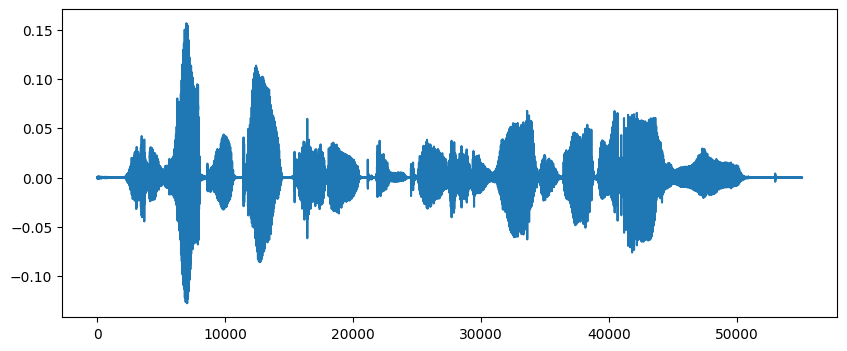

In [71]:
fig, axes = plt.subplots(waveform_np.shape[0], 1, figsize=(10, 4))
axes = np.atleast_1d(axes)
for i, ax in enumerate(axes):
    ax.plot(waveform_np[i, :])
plt.show()

# _, ax = plt.subplots(1, 1, figsize=(10, 4))
# ax.plot(x[0, :])
# plt.show()

### Fourier Transform
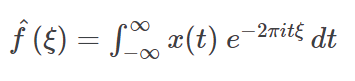

In [48]:
from torch.fft import fft

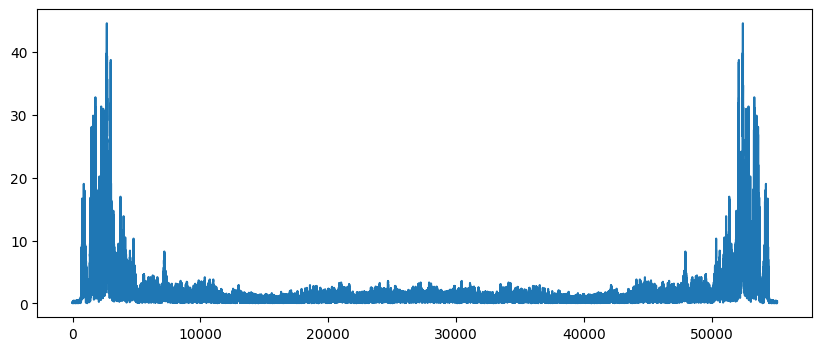

In [70]:
fft_x = fft(waveform[0])  # torch.float32
fig = plt.figure(figsize=(10, 4))
plt.plot(np.abs(fft_x).reshape(-1))
plt.show()

### STFT (Short-time Fourier Transform)

In [55]:
import librosa
from librosa.display import specshow

Text(0.5, 1.0, 'Spectrogram (dB)')

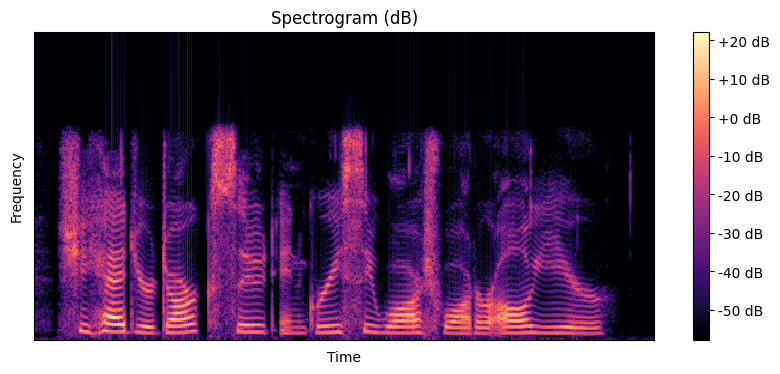

In [106]:
x, sr = librosa.load('Original.wav')
stft_x = librosa.stft(x, n_fft=512, hop_length=128, win_length=512, window='hamming')
spectrogram_x = np.abs(stft_x)
spectrogram_x = librosa.amplitude_to_db(spectrogram_x)

plt.figure(figsize=(10,4))
librosa.display.specshow(spectrogram_x, sr=16000, hop_length=128)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

### PSD (Power Spectral Density)

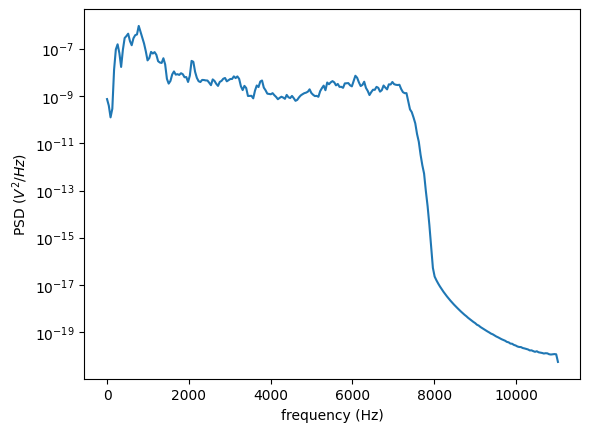

In [107]:
from scipy.signal import welch

f, Pxx_den = welch(x, sr, nperseg=512)  # nperseg는 window length를 결정하는 옵션
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD ($V^{2}/Hz$)')
plt.show()